## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [5]:
name='Anton Chernyshev' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install sktime
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

     |████████████████████████████████| 5.7MB 5.5MB/s 
     |████████████████████████████████| 9.5MB 43.7MB/s 
     |████████████████████████████████| 22.2MB 1.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [39]:
#code here (1 pt.)
df=pd.read_csv('df.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [18]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [ ]:
# answer (0.5 pt.)
0

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [ ]:
# answer (0.5 pt.)
int64

Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [41]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [42]:
# code here (0.25 pt.)
df.index = df['date']

What is the size of the dataset?

use ```.shape```

In [43]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [90]:
# code here (0.25 pt.)
df = df.drop(['day'], axis=1)
df = df.drop(['month'], axis=1)
df = df.drop(['year'], axis=1)
df = df.drop(['date'], axis=1)

What is the size of the dataset now?

In [45]:
# code here (0.25 pt.)
df.shape

(147, 2)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [91]:
# code here (0.25 pt.)
y = df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [92]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe765c2a9b0>)

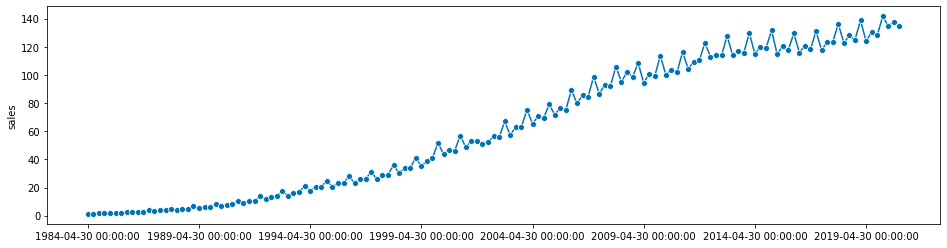

In [93]:
# code here (0.25 pt.)
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [94]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe765b9df28>)

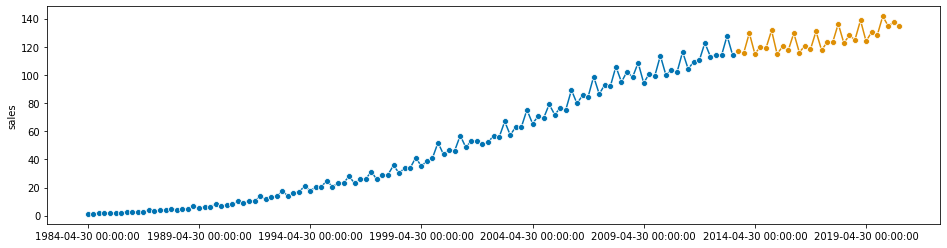

In [95]:
# code here (0.25 pt.)
plot_series(y_train, y_test)


## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [103]:
# code here (0.5 pt.)
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit(y_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/exponential_smoothing/ets.py:1135: RuntimeWarning: invalid value encountered in log
  logL -= np.sum(np.log(yhat))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [100]:
# code here (0.5 pt.)
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit(y_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [104]:
# code here (0.25 pt.)
fit_MAA.forecast(steps=30)

2013-07-31    105.090172
2013-10-31     92.621749
2014-01-31     80.698328
2014-04-30     66.994900
2014-07-31     58.012482
2014-10-31     45.544058
2015-01-31     33.620638
2015-04-30     19.917210
2015-07-31     10.934792
2015-10-31     -1.533632
2016-01-31    -13.457053
2016-04-30    -27.160481
2016-07-31    -36.142899
2016-10-31    -48.611323
2017-01-31    -60.534743
2017-04-30    -74.238171
2017-07-31    -83.220589
2017-10-31    -95.689013
2018-01-31   -107.612433
2018-04-30   -121.315861
2018-07-31   -130.298279
2018-10-31   -142.766703
2019-01-31   -154.690124
2019-04-30   -168.393552
2019-07-31   -177.375970
2019-10-31   -189.844394
2020-01-31   -201.767814
2020-04-30   -215.471242
2020-07-31   -224.453660
2020-10-31   -236.922084
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [107]:
# code here (0.25 pt.)
fit_AAM.forecast(steps=30)

2013-07-31    119.244506
2013-10-31    117.867110
2014-01-31    133.457547
2014-04-30    118.815426
2014-07-31    124.107486
2014-10-31    122.625404
2015-01-31    138.791396
2015-04-30    123.517100
2015-07-31    128.970465
2015-10-31    127.383699
2016-01-31    144.125244
2016-04-30    128.218775
2016-07-31    133.833445
2016-10-31    132.141993
2017-01-31    149.459092
2017-04-30    132.920450
2017-07-31    138.696424
2017-10-31    136.900287
2018-01-31    154.792940
2018-04-30    137.622124
2018-07-31    143.559403
2018-10-31    141.658582
2019-01-31    160.126789
2019-04-30    142.323799
2019-07-31    148.422383
2019-10-31    146.416876
2020-01-31    165.460637
2020-04-30    147.025473
2020-07-31    153.285362
2020-10-31    151.175170
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe766777668>)

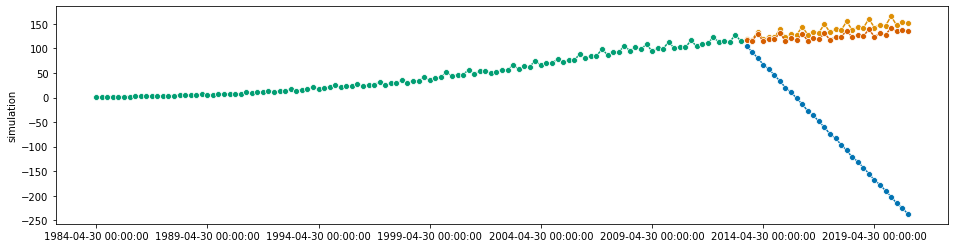

In [109]:
# code here (0.5 pt.)
plot_series(fit_MAA.forecast(steps=30), fit_AAM.forecast(steps=30), y_train, y_test)

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [111]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int=pred_MAA.pi_upper
lower_int=pred_MAA.pi_lower

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe765aa5668>)

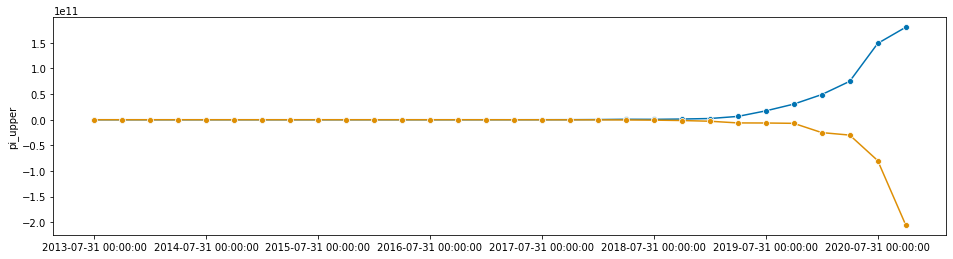

In [112]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int)

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [113]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int=pred_AAM.pi_upper
lower_int=pred_AAM.pi_lower

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe765a00ba8>)

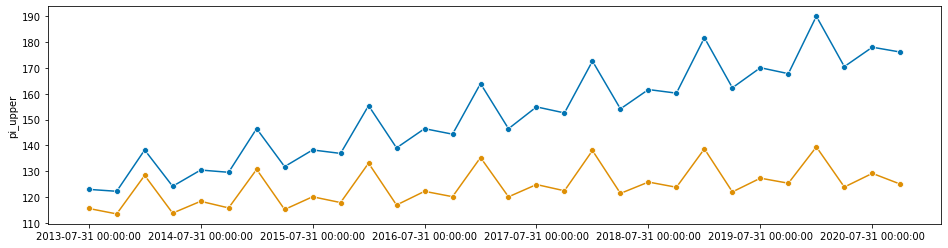

In [114]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int)

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [123]:
# code here (0.5 pt.) MAA
import sklearn.metrics as skmet
skmet.mean_absolute_error(y_test, fit_MAA.forecast(steps=30))

191.9908564055745

In [124]:
# code here (0.5 pt.) AAM
skmet.mean_absolute_error(y_test, fit_AAM.forecast(steps=30))

12.709512923154152

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [125]:
# code here (0.5 pt.) MAA
skmet.mean_squared_error(y_test, fit_MAA.forecast(steps=30))

48375.57591012228

In [126]:
# code here (0.5 pt.) AAM
skmet.mean_squared_error(y_test, fit_AAM.forecast(steps=30))

195.98109218109937

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [128]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [129]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30))

149.95305982942608

In [130]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30))

9.993797051046748

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [ ]:
# code here (1 pt.)
AAM model
